# Importing packages

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


from ruleopt import RUGClassifier
from ruleopt.rule_cost import Gini
from ruleopt.solver import ORToolsSolver
import pandas as pd
from xgboost import XGBClassifier
from ruleopt import RUXXGBClassifier
from sklearn.model_selection import GridSearchCV
from ruleopt import RUGClassifier
from ruleopt.rule_cost import Gini, Length
from ruleopt.solver import GurobiSolver

# Obtaining performance metrics

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: class, Length: 1728, dtype: int64
Accuracy: 0.92
Accuracy: 0.92
Precision: 0.77
Recall: 0.81
F1 Score: 0.78
ROC AUC Score: 0.98


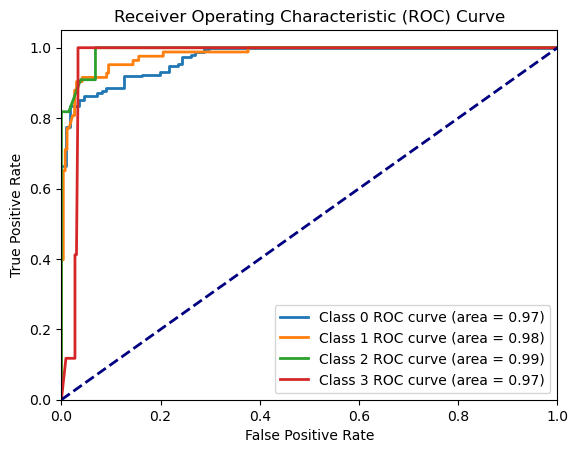

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def main():
    data = pd.read_csv('/Users/x/Downloads/car_car7.csv')
    
    # Prepare the data
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    print(y)

    # Split the data
    random_state = 42
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    solver = ORToolsSolver()
    rule_cost = Gini()

    # Initialize the RUGClassifier with specific parameters
    rug = RUGClassifier(
        solver=solver,
        random_state=random_state,
        max_depth=3,
        max_rmp_calls=20,
        rule_cost=rule_cost,
    )

    # Fit the RUGClassifier to the training data
    rug.fit(X_train, y_train)

    # Predict the labels and probabilities of the testing set
    y_pred = rug.predict(X_test)
    y_pred_proba = rug.predict_proba(X_test)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC AUC Score: {roc_auc:.2f}")

    # Generate ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc_dict = dict()
    for i in range(y_pred_proba.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc_dict[i] = auc(fpr[i], tpr[i])

    # Plot ROC AUC curve for each class
    plt.figure()
    for i in range(y_pred_proba.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc_dict[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

if __name__ == "__main__":
    main()


Accuracy: 0.94
Precision: 0.94
Recall: 0.91
F1 Score: 0.92
Confusion Matrix:
[[93  2]
 [ 7 38]]
Matthews Correlation Coefficient: 0.85
ROC AUC Score: 0.85


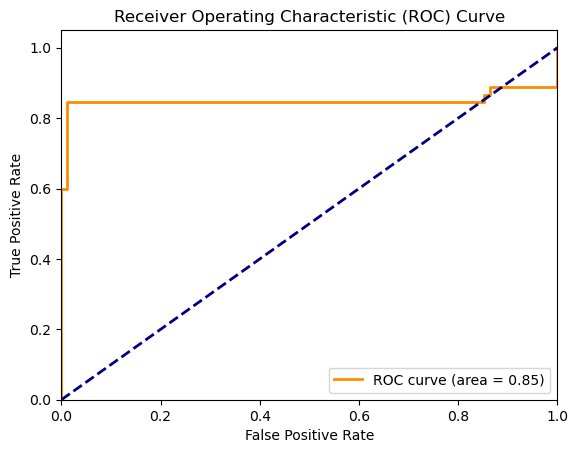

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

def main():
    data = pd.read_csv('/Users/x/Downloads/modified_cell_samples.csv')
    # Prepare the data
    y = data.iloc[:, -1]  # Last column is the target variable
    X = data.iloc[:, :-1]  # All other columns are features

   
    # Split the data
    random_state = 42
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    solver = ORToolsSolver()
    rule_cost = Gini()

    # Initialize the RUGClassifier with specific parameters
    rug = RUGClassifier(
        solver=solver,
        random_state=random_state,
        max_depth=3,
        max_rmp_calls=20,
        rule_cost=rule_cost,
    )

    # Fit the RUGClassifier to the training data
    rug.fit(X_train, y_train)

    # Predict the labels of the testing set
    y_pred = rug.predict(X_test)
    y_prob = rug.predict_proba(X_test)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Matthews Correlation Coefficient: {mcc:.2f}")

    # Calculate ROC AUC score and generate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    print(f"ROC AUC Score: {roc_auc:.2f}")

    # Plot ROC AUC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

if __name__ == "__main__":
    main()


Accuracy: 0.66
Precision: 0.65
Recall: 0.66
F1 Score: 0.65
Confusion Matrix:
[[12  6  1  0  0  0]
 [ 5 12  1  3  1  1]
 [ 2  1  1  0  0  0]
 [ 0  1  0  5  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]
Matthews Correlation Coefficient: 0.56
General ROC AUC Score: 0.89


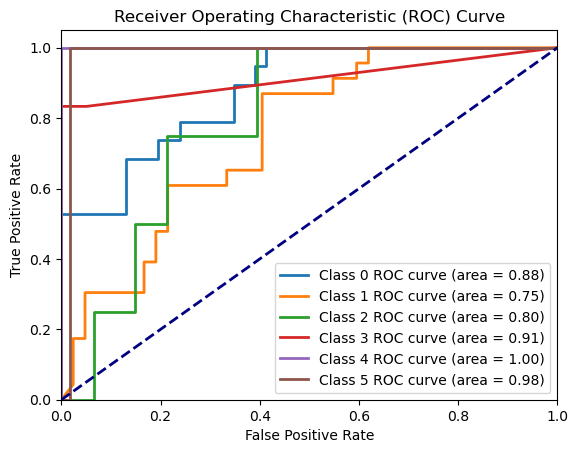

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

def main():
    data = pd.read_csv('/Users/x/Downloads/glass_ruleopt.csv')
    # Prepare the data
    y = data.iloc[:, -1]  # Last column is the target variable
    X = data.iloc[:, :-1]  # All other columns are features

    # Split the data
    random_state = 42
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state
    )

    solver = ORToolsSolver()
    rule_cost = Gini()

    # Initialize the RUGClassifier with specific parameters
    rug = RUGClassifier(
        solver=solver,
        random_state=random_state,
        max_depth=3,
        max_rmp_calls=20,
        rule_cost=rule_cost,
    )

    # Fit the RUGClassifier to the training data
    rug.fit(X_train, y_train)

    # Predict the labels and probabilities of the testing set
    y_pred = rug.predict(X_test)
    y_prob = rug.predict_proba(X_test)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Matthews Correlation Coefficient: {mcc:.2f}")

    # Calculate ROC AUC score and generate ROC curve for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(y.unique())

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calculate general ROC AUC score
    roc_auc_general = roc_auc_score(y_test, y_prob, average='macro',multi_class='ovr')
    print(f"General ROC AUC Score: {roc_auc_general:.2f}")

    # Plot ROC AUC curve for each class
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

if __name__ == "__main__":
    main()


# Rules generating

In [101]:
from ruleopt import RUGClassifier, Explainer
from ruleopt.rule_cost import Length

def main():
    # Set a random state for reproducibility
    random_state = 42

    # Load the Iris dataset
    data = pd.read_csv('/Users/x/Downloads/glass_ruleopt.csv')
    y = data.iloc[:, -1]  # Last column is the target variable
    X = data.iloc[:, :-1]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.05, random_state=random_state
    )

    # Define tree parameters
    tree_parameters = {"max_depth": 3}
    rule_cost = Length()

    # Initialize the RUGClassifier with specific parameters
    rug = RUGClassifier(
        random_state=random_state,
        max_rmp_calls=3,
        rule_cost=rule_cost,
        **tree_parameters
    )

    # Fit the RUGClassifier to the training data
    rug.fit(X_train, y_train)

    # Initialize the Explainer with the fitted RUGClassifier
    exp = Explainer(rug)

    # Example usage of the Explainer's methods:

    # 1. Retrieve rule details. You can either specify indices of specific rules or leave it as None to get all rules.
    rule_details = exp.retrieve_rule_details(
        feature_names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],
        info=True,
    )

    # 2. Find applicable rules for samples in the test set
    applicable_rules = exp.find_applicable_rules_for_samples(
        X_test,
        threshold=0,
        feature_names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],
        info=True,
    )

    # 3. Summarize rule metrics to understand the overall rule complexity and count
    rule_metrics_summary = exp.summarize_rule_metrics(info=True)

    # 4. Evaluate rule coverage metrics to understand how well the rules cover the test dataset
    rule_coverage_metrics = exp.evaluate_rule_coverage_metrics(X_test, info=True)
    num_samples = X_test.shape[0]
    num_rules = len(rule_details)

    # Calculate fraction uncovered
    uncovered_samples = 0
    for sample_idx in range(num_samples):
        if not any(applicable_rules[sample_idx]):
            uncovered_samples += 1
    frac_uncovered = uncovered_samples / num_samples

    # Calculate fraction overlap
    overlapping_samples = 0
    for sample_idx in range(num_samples):
        if sum(applicable_rules[sample_idx]) > 1:
            overlapping_samples += 1
    frac_overlap = overlapping_samples / num_samples

    # Print the additional metrics
    print(f"Fraction of samples uncovered by any rule: {frac_uncovered:.2f}")
    print(f"Fraction of samples covered by multiple rules (overlap): {frac_overlap:.2f}")

if __name__ == "__main__":
    main()

RULE 0:
-inf      < RI        <= 1.52      or null
-inf      < K         <= 0.02      and not null
Class: 4
Scaled rule weight: 1.0000

RULE 1:
0.37      < K         <= inf       or null
3.61      < Mg        <= inf       and not null
Class: 1
Scaled rule weight: 0.8826

RULE 2:
8.27      < Ca        <= 9.53      or null
3.01      < Mg        <= inf       or null
Class: 2
Scaled rule weight: 0.8816

RULE 3:
-inf      < Ca        <= 10.48     or null
-inf      < Al        <= 1.42      or null
-inf      < Ba        <= 0.34      or null
Class: 0
Scaled rule weight: 0.8769

RULE 4:
1.98      < Mg        <= inf       or null
1.42      < Al        <= inf       and not null
-inf      < Ba        <= 0.34      or null
Class: 1
Scaled rule weight: 0.8486

RULE 5:
72.72     < Si        <= 74.81     or null
-inf      < Al        <= 1.26      or null
Class: 1
Scaled rule weight: 0.8477

RULE 6:
69.85     < Si        <= 70.16     or null
0.34      < Ba        <= inf       and not null
Class: 3
Scale

In [90]:
from ruleopt import RUGClassifier, Explainer
from ruleopt.rule_cost import Length

def main():
    # Set a random state for reproducibility
    random_state = 42

    # Load the Iris dataset
    data = pd.read_csv('/Users/x/Downloads/titanic_ro2.csv')
    y = data.iloc[:, -1]  # Last column is the target variable
    X = data.iloc[:, :-1]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.05, random_state=random_state
    )

    # Define tree parameters
    tree_parameters = {"max_depth": 3}
    rule_cost = Length()

    # Initialize the RUGClassifier with specific parameters
    rug = RUGClassifier(
        random_state=random_state,
        max_rmp_calls=3,
        rule_cost=rule_cost,
        **tree_parameters
    )

    # Fit the RUGClassifier to the training data
    rug.fit(X_train, y_train)

    # Initialize the Explainer with the fitted RUGClassifier
    exp = Explainer(rug)

    # Example usage of the Explainer's methods:

    # 1. Retrieve rule details. You can either specify indices of specific rules or leave it as None to get all rules.
    rule_details = exp.retrieve_rule_details(
        feature_names=['Passenger_Cat_2nd_class', 'Passenger_Cat_3rd_class',
       'Passenger_Cat_crew', 'Age_Cat_child', 'Gender_male'],
        info=True,
    )

    # 2. Find applicable rules for samples in the test set
    applicable_rules = exp.find_applicable_rules_for_samples(
        X_test,
        threshold=0,
        feature_names=['Passenger_Cat_2nd_class', 'Passenger_Cat_3rd_class',
       'Passenger_Cat_crew', 'Age_Cat_child', 'Gender_male'],
        info=True,
    )

    # 3. Summarize rule metrics to understand the overall rule complexity and count
    rule_metrics_summary = exp.summarize_rule_metrics(info=True)

    # 4. Evaluate rule coverage metrics to understand how well the rules cover the test dataset
    rule_coverage_metrics = exp.evaluate_rule_coverage_metrics(X_test, info=True)


if __name__ == "__main__":
    main()

RULE 0:
-inf      < Age_Cat_child <= 0.50      or null
0.50      < Passenger_Cat_3rd_class <= inf       and not null
-inf      < Gender_male <= 0.50      and not null
Class: 1
Scaled rule weight: 1.0000

RULE 1:
0.50      < Age_Cat_child <= inf       and not null
0.50      < Passenger_Cat_3rd_class <= inf       and not null
-inf      < Gender_male <= 0.50      and not null
Class: 1
Scaled rule weight: 1.0000

RULE 2:
-inf      < Passenger_Cat_2nd_class <= 0.50      or null
-inf      < Age_Cat_child <= 0.50      or null
0.50      < Gender_male <= inf       or null
Class: 1
Scaled rule weight: 1.0000

RULE 3:
0.50      < Passenger_Cat_2nd_class <= inf       and not null
-inf      < Age_Cat_child <= 0.50      or null
0.50      < Gender_male <= inf       or null
Class: 1
Scaled rule weight: 1.0000

RULE 4:
0.50      < Passenger_Cat_3rd_class <= inf       or null
0.50      < Age_Cat_child <= inf       and not null
0.50      < Gender_male <= inf       or null
Class: 1
Scaled rule weight: 1.0

In [100]:
from ruleopt import RUGClassifier, Explainer
from ruleopt.rule_cost import Length

def main():
    # Set a random state for reproducibility
    random_state = 42

    # Load the Iris dataset
    data = pd.read_csv('/Users/x/Downloads/dry_beans_ro_mapped_2.csv')
    data = data.fillna(0)
    y = data.iloc[:, -1]  # Last column is the target variable
    X = data.iloc[:, :-1]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.05, random_state=random_state
    )

    # Define tree parameters
    tree_parameters = {"max_depth": 3}
    rule_cost = Length()

    # Initialize the RUGClassifier with specific parameters
    rug = RUGClassifier(
        random_state=random_state,
        max_rmp_calls=3,
        rule_cost=rule_cost,
        **tree_parameters
    )

    # Fit the RUGClassifier to the training data
    rug.fit(X_train, y_train)

    # Initialize the Explainer with the fitted RUGClassifier
    exp = Explainer(rug)

    # Example usage of the Explainer's methods:

    # 1. Retrieve rule details. You can either specify indices of specific rules or leave it as None to get all rules.
    rule_details = exp.retrieve_rule_details(
        feature_names=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
        info=True,
    )

    # 2. Find applicable rules for samples in the test set
    applicable_rules = exp.find_applicable_rules_for_samples(
        X_test,
        threshold=0,
        feature_names=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
        info=True,
    )

    # 3. Summarize rule metrics to understand the overall rule complexity and count
    rule_metrics_summary = exp.summarize_rule_metrics(info=True)

    # 4. Evaluate rule coverage metrics to understand how well the rules cover the test dataset
    rule_coverage_metrics = exp.evaluate_rule_coverage_metrics(X_test, info=True)


if __name__ == "__main__":
    main()

RULE 0:
0.79      < roundness <= inf       or null
0.80      < Eccentricity <= inf       or null
0.01      < ShapeFactor1 <= inf       and not null
Class: 5
Scaled rule weight: 1.0000

RULE 1:
-inf      < Perimeter <= 711.31    or null
0.01      < ShapeFactor1 <= inf       or null
-inf      < MajorAxisLength <= 280.70    and not null
Class: 4
Scaled rule weight: 1.0000

RULE 2:
711.31    < Perimeter <= inf       and not null
0.01      < ShapeFactor1 <= inf       or null
-inf      < MajorAxisLength <= 280.70    and not null
Class: 4
Scaled rule weight: 1.0000

RULE 3:
-inf      < ShapeFactor3 <= 0.70      or null
-inf      < Perimeter <= 854.74    and not null
-inf      < EquivDiameter <= 385.14    or null
Class: 6
Scaled rule weight: 0.9993

RULE 4:
216.03    < EquivDiameter <= 231.78    or null
-inf      < Perimeter <= 778.18    and not null
Class: 4
Scaled rule weight: 0.9952

RULE 5:
-inf      < ShapeFactor3 <= 0.58      or null
0.01      < ShapeFactor1 <= inf       or null
778.18  

# Grid Search CV

In [123]:
"""Example: Classifying the Iris Dataset with RUGClassifier using GridSearchCV"""

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from ruleopt import RUGClassifier
from ruleopt.rule_cost import Gini, Length
from ruleopt.solver import GurobiSolver


def main():
    # Ensure reproducibility by setting a fixed random state
    random_state = 42

    # Load the Iris dataset, a popular example for classification tasks
  
    # Load the Iris dataset
    data = pd.read_csv('/Users/x/Downloads/car_car7.csv')
    
    # Prepare the data
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Initialize the Gurobi solver for optimizing the RUGClassifier
    solver = GurobiSolver()

    # Create an instance of RUGClassifier with the specified solver and random state
    rug_classifier = RUGClassifier(solver=solver, random_state=random_state)

    # Define a grid of parameters to search over
    
    param_grid = {
    "rule_cost": [Gini(), Length()],
    "max_rmp_calls": [3, 6],
    "max_depth": [2, 4,10],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 4],
    "threshold": [1e-4,1e-2],
    "max_features": ["auto","sqrt","log2"],
    "max_leaf_nodes": [None, 10,20],
    "min_impurity_decrease": [0.0,0.2],
    "ccp_alpha": [0.0]
    }

    # Configure GridSearchCV with the RUGClassifier, parameter grid, and other settings
    grid_search = GridSearchCV(
        estimator=rug_classifier,
        param_grid=param_grid,
        cv=3,  # Use 3-fold cross-validation
        scoring="accuracy",  # Use accuracy as the measure of model quality
        verbose=2,  # Show detailed progress
    )

    # Fit the model to the data, searching over the defined grid of parameters
    grid_search.fit(X, y)

    # Output the best parameters and the corresponding score after the search
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)


if __name__ == "__main__":
    main()

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits
[CV] END ccp_alpha=0.0, max_depth=2, max_features=auto, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=auto, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=auto, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=auto, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_l

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.7s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gi

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gi

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gin

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini obj

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gi

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.ru

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gi

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gin

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini obj

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gi

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini obj

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gi

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=2, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=auto, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=auto, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini 

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.2s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.2s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_co

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_co

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.2s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gi

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gin

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini objec

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.2s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini obj

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini obj

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gin

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini obj

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=4, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.ru

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rul

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.3s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.ru

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rul

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Leng

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=sqrt, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.r

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.ru

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.ru

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=None, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.G

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cos

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=10, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length o

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gi

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_c

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=3, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Gini

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=2, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=1, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s

[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Gini object at 0x130b5d120>, threshold=0.01; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.Length object at 0x130b5ec80>, threshold=0.0001; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=10, max_features=log2, max_leaf_nodes=20, max_rmp_calls=6, min_impurity_decrease=0.2, min_samples_leaf=4, min_samples_split=10, rule_cost=<ruleopt.rule_cost.rule_cost.

/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_solver.py:107: RuntimeWarning: invalid value encountered in multiply
  sample_weight @ vs + (costs * self.penalty * normalization_constant) @ ws,
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/base_sklearn.py:187: RuntimeWarning: invalid value encountered in scalar multiply
  ) - (cost * self.solver.penalty * normalization_constant)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/estimator/sklearn_/rug.py:231: RuntimeWarning: divide by zero encountered in scalar divide
  normalization_constant = 1.0 / np.max(self.coefficients_.costs)
/Users/x/miniconda3/envs/orange3/lib/python3.10/site-packages/ruleopt/solver/gurobi_s